# FEED FORWARD NEURAL NETOWRK

**Outline**
1. Generate data that is not linearly separable
2. Train with SN and see performance
3. Write from scratch our first feed forward network
4. Train the FF network on the data and compare with SN
5. Write a generic class for a FF network
6. Train generic class on binary classification
7. Generate data for multi-class classification
8. Train a FF network for 7
9. Use softmax as the output layer and cross-entropy loss function
10. Train with 8 for multi-class classification
11. Exercises on other datasets

## Setup

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

# new libraries introduced in the lecture
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

## Class For Sigmoid Neuron

In [32]:
class SigmoidNeuron:
    
  # Initialisation Part:-
  
  def __init__(self):
    self.w = None
    self.b = None
    
  # Forward Pass Part:-
  
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  # Gradient Decent Part:-
  
  # mse means MEAN SQUARED ERROR, and ce means CROSS ENTROPY
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  # Fitting Data Part:-
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
          
      m = X.shape[1]  
      '''WHY DIVIDE BY 'm' - if a particular wweigt has to reduce dependin on  items we see the reduction in the wight will be larger or smallerdepending on how large
      or small our 'm' is, to deal with that we have to typically change the learning rate(large no of inputs small lr and vice versa)
      to avoid this and to keep the learning rate independent of the no. of inputs we are looking at we are dividing by m- to NORMALISE it'''
      self.w -= learning_rate * dw/m 
      self.b -= learning_rate * db/m

      # Loss Computation:-
      # mse means MEAN SQUARED ERROR, and ce means CROSS ENTROPY
      # both can be used as specified in the fit function
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()

  # Predict Function:-
    
  # given a large set of inputs X and a trained model(alredy trained in fit) we simply do the forward pass for it(y_pred)
  # and send themm back and append it 
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred) 

In [33]:
# Creatnig a color map to use later
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"]) 

## Generate Data

In [34]:
''' make blob - "from sklearn.datasets import make_blobs" is called in the setup part and is  
used for creating datasets for machine learning methods
takes as input the number of samples that we want to genereate, number of input features that we will like to have
center tells us how may blobs(clusters) we want
random state ensures that the entire thing is repeatable'''

# we will get 2 outputs here data and lables
# data is the feature value -  we have 1000 samples with 2 features each(we get a 1000 row matrix with 2 column) - input X
# lables - for each of the data points it belongs to one of the each 4 centers(weather it is 0,1,2 or 3) is identified by this lable (1000 rows single column)
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


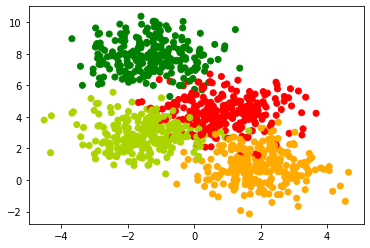

In [35]:
# Potting the above generated data and plotting it using a scatter plot
'''data[:,0] - means X axis has data 0
data[:,1]- means Y axis has data 1
c - gives the color according to the 4 lables be had used in our data generation
cmap - the color map we described earlier'''

plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

We firstly want to understand how binary classification in Feed Forward Neural Netowrk Works  
so we will generate binary classification data using the above generated data  
so we will somehow combine the above clusters to have only 2 centers   

In [36]:
labels_orig = labels
# there were 4 lables (0,1,2,3) now to divide them into 2 clusters we take the mod of each number and put them into classes
# so now the new lable will have all the lables with were earlier divisible by 2 and the other new lable will have the rest
# and this method will work for all the number of older column, in this particular case we had 2
labels = np.mod(labels_orig, 2)

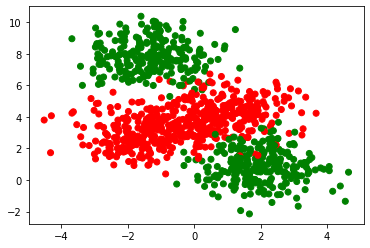

In [37]:
# Plotting the new binarised lable
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()
# Now we have a binary classification problem such that the decision boundry is not linear
# This plot is acting as 3D plot as it 2 dimentions of the X features and the 3rd dimentions of the color which tells what is the predicted value

## Train Test Split for SN and BCC

As we know we can use libraries from sklearn to split our train and test data (refer to previous notebook to understand how this exactly works)

In [38]:
# we are now callin the test spit as val, val stands for validatoin(more common to call it as validation set)
# Train set is what we are training on and val set is what we will test late on, to check the actual performance
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


## SNC - Sigmoid Neuron Classification

<ipython-input-32-805bfae250ab>:58: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

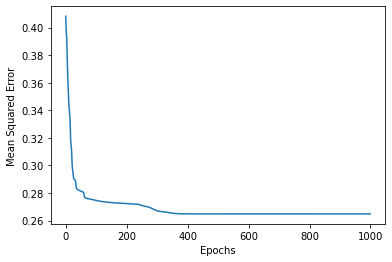

In [39]:
# Instanciating the sigmoid neuron
sn = SigmoidNeuron()
# callin the fit functions with the X_train and Y_train datasets.   
sn.fit(X_train, Y_train, epochs=1000, learning_rate=0.5, display_loss=True)

In [40]:
# pridicted values for the X_train dataset using the sn.predict function
Y_pred_train = sn.predict(X_train)

# we would like to binarise this - if >= 0 it will be one or else it will be 0
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

# we are doinf the same thing that we did for x_train to val
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

# accuracy_score is a sk-learn library which helps us compute the accuracy of the given model(for more detail check previous notebooks)
# we calculate it for both train and val
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

# we are printing the accuracy scores
# we use round so that we can see 2 decimal values
print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

# The result is not so bad and not too good - something with an accuracy of 0.5, 0.73 is a respectable accuracy score, but it is not that great

Training accuracy 0.73
Validation accuracy 0.72


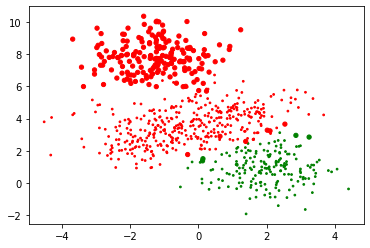

In [41]:
# we would like to plot what the model is predicting and what is th e class lable
# we will do this for the trainning set only

'''has X and Y axis as the oth and the first coulumn of the X_train
c - we are using the predict binarised train  - the color that the class lable is predicting(green) and the rest together(red)
size - it takes the difference between the binarised_trian_data (predicted value) and Y_train actual value - 
If they ground truth and the predicted value were matching correctly it would give 0 and then we will get something like (0.2*15 = 3)
if hey ground truth and the predicted value were not matching hten we would get a difference of 1(because it is a absolute values-abs) ((1*0.2)*15 = 18)
if the prediction was true we will get the size 3
if the prediction was not true we will get the size 18
depending on that the size will vary on the graph

so in the graph all the large values are wrongly being predicted
'''
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()
# This plot is acting as 4D plot as it 2 dimentions of the X features, 
# the 3rd dimentions of the color which tells what is the predicted value, the 4th dimention of size which tells correctly or wrongly predicted.

In the above plot we can see that se sigmoid neuron is unable to classify the data as it is linearly unsepreable i.e. it is non-linear data  
What it is learning is to classifya t some points which are clearly linearly seprable  
but that leaves the data which might be above the linearly seperable data to be wrongly classified - as seen in the example we just took.  
So as we can see a sigmoid neuron is ubable to solve this problem, now lets take a look at neural networks.

## BCC - Binary Class Classification

## Our First FF Network

We will be making a Feet Forward Neural Netowrk (SimplenNetwor.png)

In [42]:
class FirstFFNetwork:
  
  # Initialization:-
  
  # Eralier we had single w and b now we all the wights and biases that we need for our neural network
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  # Forward Pass:-
  
  # sigmoid function
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  # given an input x we will like to compute it's correspondin y
  def forward_pass(self, x):
    # here x will contain 2 values and the first value will go the the first variable that is x1 and the second value will go to the second variable x2
    self.x1, self.x2 = x
    # PREACTIVATION - here a1 has a simple formula - w1 * x1 + w2 * x2 + b
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    # ACTIVATION - here we pass the preactivation a1 through the sigmoid function
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    # FINAL putput which is returned
    return self.h3
  
  # Gradient Computation:
  
  # given an input x & y what changes we should make or simply what are the derivative of the different parameters (will be taught later - BLACK BOX    )
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  # Fitting the function:-
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    # the actual learning algo which is going through several epoch's. tqdm just enables us to show the progress bar
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        # self.dw1 is different from dw1. self.dw1 is a set by the grad function for a given input. dw1 is the cumalative change gor all input seen in so far
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
    # Loss Calculations
      if display_loss:
        Y_pred = self.predict(X)
        # mean_squared_error is a sklearn.metric library 
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  # Predict Function
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

## FFNetwork Classification

<ipython-input-42-ca4b11015238>:76: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/2000 [00:00<?, ?epoch/s]

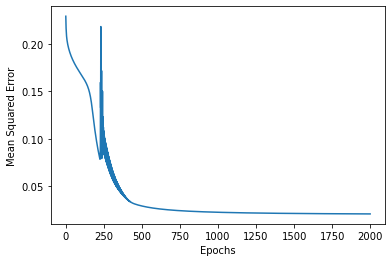

In [43]:
# Instanciating Feed Forward Neural Netork
ffn = FirstFFNetwork()
# Callin hte fit function
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

There is a bit of jumping around in the middle which shows that the learning rate is probably too large. But at the end the we seem to have come towards a fairly small loss
* note this message was applicable originaly when the learning_rate in the above fit function was 0.1 I have updated it to 0.01

In [44]:
# We will take the predicted values and convert them into binarised verion of them both for the train and val data.

#pridicted values for the X_train dataset using the ffn.predict function
Y_pred_train = ffn.predict(X_train)

# we would like to binarise this - if >= 0 it will be one or else it will be 0
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()


# same as above for the val dataset
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

# accuracy_score is a sk-learn library which helps us compute the accuracy of the given model(for more detail check previous notebooks)
# we calculate it for both train and val
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


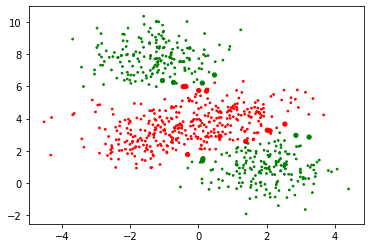

In [45]:
# # we would like to plot what the model is predicting and what is th e class lable
# we will do this for the trainning set only (for more information check the sigmoid plot for the same cell no. - 67)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

most of the points are correctly classified, the points which are large are wrongly classified.
We were able to classify a non linear dataset using a simple feed forward neural netowrk only using 3 sigmoid neurons.

## Feed Forward netowrk - Generic Class

In [46]:
class FFSNNetwork:
  
  '''
  n_inputs - number of inputs that we take
  
  hidden_sizes - no. of hidden layers(by default a lsit whcih has 2 passed into it. 
  List contains for each layer the number of neurons we have. In this case it is saying a single layer with 2 neuronss)
  
  nx - becomes the number of inputs internally

  ny - is the output here we are making for single class, as we go to multiclass classification this will hold different values
  
  nh - number of hidden layers internally given by a list
  
  sizes - the n,n0, n1 n2 are given by this(see fig- FFNetworkSingle.png)
  To hidden sizes we are prepending the number of inputs and ve are appending the number of outputs - This give the size of all the layers, going from 0 to nh+1 (see fig- FFNetworkSingle.png)
  '''
  def __init__(self, n_inputs, hidden_sizes=[2]):
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]
    
    '''
    We declare all the weights with the help of dictonaries - (W and B)
    FOR W
    number of W's = n1 * nx (no. of the input of L1 layer and the input of L0 layer) - forms a matrix of size n1*nx - nx rows and n1 columns. 
    Similarly for the next layer - n1*n2 - n1 rows and n2 coulumns and so on
    Each of these matrices is stored as one item in a dictionary
    W(i) -  will be a matrix which has nx rows and n1 column, W(i+1) (which means W(2)) will be another such matrix with n1 rows and n2 coulmns
    we are setting the value of the matris to random value as we did in previous cases
    
    FOR B
    B[i+1](which is B(1)) gives a vector of one row and as many value as there are neurons in the Lth row in this case - n1
    '''
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  # sigmoid function
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  '''
  A and H are dictionaries which are also describes in the same way as  W and B (the numbering)
  As a convention we are declaring H[0] as equal to the input. so instead of calling the input layer x we are calling it H0
  reshaping H to have 1(1 does that inside resize) row and as many column as possible (-1 does that inside resize)
  
  We are looping through all the layers
  we are first computing A - matrix multiplication of (ith layer H * W[i+1] (all the inputs * the weights of first layer for A[1])) and then we add the bias term of the corresponding layer
  
  Then we transform A to H that is we pass the A through the sigmoid function
  
  When we do this for nh+1 layer - the final layers output will be out y value which is returned
  '''
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  # not touched black box will learn 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  '''
  fit function is essentially the same
  
  in the learining algo:
  initilisin dw value -  which will capture the changes we need to make in the each parameter
  initially they are defined as zeros of the appropriate sizes that w and b respectively are
  ''' 
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    # learning algorithm
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
    
    # loss function
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
    
  # the pridict function -  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

<ipython-input-46-bf2e859323a5>:104: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

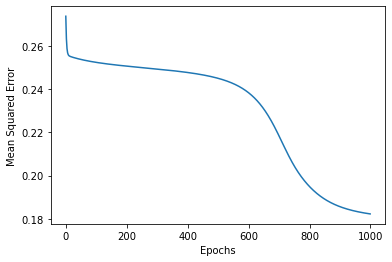

In [47]:
# instanciate the genral FFN - we are taking 2 inputs and the 
# hidden sizes -[2,3] which means it has 2(number of elements in the list) layers and the first one has 2 sigmoid neurona and the second one has 3 sigmoid nuurons
ffsnn = FFSNNetwork(2, [2, 3])
ffsnn.fit(X_train, Y_train, epochs=1000, learning_rate=.001, display_loss=True)

here we are able to see that there are bumps we should typically reduce the learning rates.(set to 0.001)  
loss function falls a bit solwely here as we have a deeper network - we have a netowrk with 2 layers and there are 5 neurons here   
and there fore it is a network with more parametes and learning over these large dimentional parameter spaces takes time.  

In [48]:
# binarising and calculating accuracy to find more see the sigmoid cell for the similar function that we did
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.73
Validation accuracy 0.72


We see here that the accuracy is not particularly inmproving as we go for a deeper model.  
So the choic of how may layers we should have and which layer should have how many sigmoids is actually interesting to look at

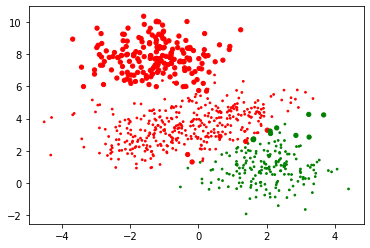

In [49]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

errors are being made at the interfaces between the red and the green. the rest of the points seem to work well  
As we train longer and longer the points which are doing badly will start to imptove

## Multi class classification

In [50]:
class FFSN_MultiClass:
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

Before we start doing anything we have to prepare the data a bit we were earlier working on binary classification were lable contailed 0 or 1 for the 2 classes.  
now we want the original setup lables_original array (cell - 6) which has 4 classes

## Test Train Split for MCC

In [51]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)
# everythings is same as before except now the labels contains 1000 valuses b/w (0-3)

(750, 2) (250, 2) (1000,)


## One Hot Encoding

The idea here is when we have input in typically some format we will have to encode it into another format which is then useful for a machine learning model to albsorve and compue with it

In [52]:
# OneHotEncoder is from the sklearn library
enc = OneHotEncoder()
# in our example we have 4 possible values. The position of '1' represents what the data item is.
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
# we are transforming both Y_train and Y_val and then printing the shapes
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)
# earlier we had lables containing 1000 values and a single column(look at the test train split ) but now we have 4 columns because of the one hot encoding 

(750, 4) (250, 4)


<ipython-input-50-c9483c962252>:74: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/2000 [00:00<?, ?epoch/s]

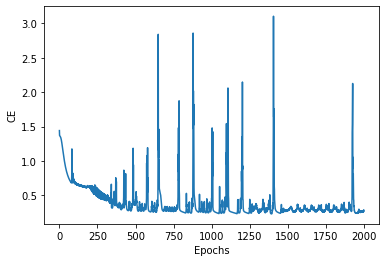

In [53]:
# our multiclass classifier has 2 inputs, it has 4 outputs given by the 4 values in y.
# two hidden layers here with 2 neurons in the first layer and 3 neurons in the second layer
ffsn_multi = FFSN_MultiClass(2,4,[2,3])
ffsn_multi.fit(X_train,y_OH_train,epochs=2000,learning_rate=.005,display_loss=True)

As we studid for MCC, the output of the function is taken using the argmax function
The output of the function will be taken by applying a argmax on the predicted values
Meaning there are 4 numbers we get and the output of the function becomes the class which has the highest probablility

In [54]:
# applying the predict function to the input
# for all of the outputs we are thaking the largest possible value and that becomes my lable. and this will be in the format the original lables are before onehot encodining
# We have fon that for the train data and the val data
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)
Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.89
Validation accuracy 0.89


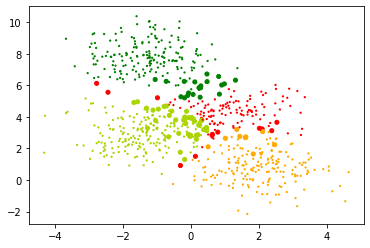

In [55]:
# plotting to visualise the accuracy(for more info see the similar operation done in the sigmoid classification)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

We are able to see that all the problems are in the interfaces b/w the different classes  
But overall it is getting the sense that there are 4 classes and it is able classify them into the respective classes

## Exercises

In [56]:
from sklearn.datasets import make_moons, make_circles

In [57]:
data, labels = make_moons(n_samples=1000, random_state=0, noise=0.15)
print(data.shape, labels.shape)

(1000, 2) (1000,)


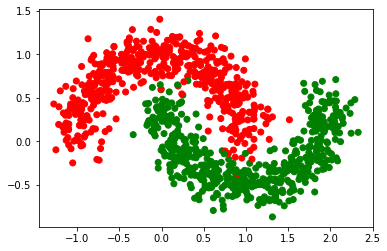

In [58]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [59]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.3)
print(data.shape, labels.shape)

(1000, 2) (1000,)


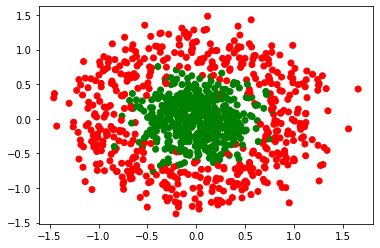

In [60]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()